# Les festivals en France 


## Installation et importation des données

In [17]:
!pip install pandas
!pip install statsmodels
!pip install sklearn
!pip install geopandas
!pip install openpyxl


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: C:\Users\lilou\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: C:\Users\lilou\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: C:\Users\lilou\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: C:\Users\lilou\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from datetime import datetime
#import random
#import math 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import geopandas as gpd
from matplotlib.animation import PillowWriter, FuncAnimation
from matplotlib import rc, animation

from fonction import ligne, nom_de_colonne, carte_1_an_rapide, carte_1_an, carte_1_an_bis, region_sans_dom, academie_sans_dom ,carte_fest_marche, lecture_fichier, data_1_an, carte_fest, hist_date_festi, hist_date_pano, into_md, carte_fest_debug, festi_sans_dom, festi_sans_dom_shapefile, make_fond_carte


# PARTIE 1 - RECUPERATION ET TRAITEMENT DES DONNEES

## Récupération des données


On récupère les données sur les festivals, en csv et en shapefile, ainsi que les données tirées du recensement et les données des fonds de cartes. 

### Données des festivals en csv

In [19]:
# Ouvrir et lire le fichier CSV - données des festivals csv
csv_url = 'https://www.data.gouv.fr/fr/datasets/r/47ac11c2-8a00-46a7-9fa8-9b802643f975'
df_festival = pd.read_csv(csv_url, sep = ';')
df_festival.head()

,nom_du_festival,envergure_territoriale,region_principale_de_deroulement,departement_principal_de_deroulement,commune_principale_de_deroulement,code_postal_de_la_commune_principale_de_deroulement,code_insee_commune,code_insee_epci_collage_en_valeur,libelle_epci_collage_en_valeur,numero_de_voie,...,sous_categorie_musique,sous_categorie_musique_cnm,sous_categorie_cinema_et_audiovisuel,sous_categorie_arts_visuels_et_arts_numeriques,sous_categorie_livre_et_litterature,periode_principale_de_deroulement_du_festival,identifiant_agence_a,identifiant,geocodage_xy,identifiant_cnm
0,Gamerz,Départementale,Provence-Alpes-Côte d'Azur,Bouches-du-Rhône,Aix-en-Provence,13090,13001,200054807,Métropole d'Aix-Marseille-Provence,1,...,NaN,NaN,NaN,Arts numériques,NaN,Après-saison (6 septembre - 31 décembre),NaN,FEST_13001_49,"43.5360708378,5.39857444582",NaN
1,Corsiclassic - festival de musique de chambre,NaN,Corse,Corse-du-Sud,Ajaccio,20000,2A004,242010056,CA du Pays Ajaccien,NaN,...,Musique classique,NaN,NaN,NaN,NaN,Après-saison (6 septembre - 31 décembre),NaN,FEST_2A004_85,"41.9347926638,8.70132275974",NaN
2,Racines de ciel,NaN,Corse,Corse-du-Sud,Ajaccio,20000,2A004,242010056,CA du Pays Ajaccien,50-52,...,NaN,NaN,NaN,NaN,"Fiction (roman, théâtre, etc.), Non-fiction (d...",Avant-saison (1er janvier - 20 juin),NaN,FEST_2A004_96,"41.9347926638,8.70132275974",NaN
3,Le grand bivouac,Intercommunale,Auvergne-Rhône-Alpes,Savoie,Albertville,73200,73011,200068997,CA Arlysère,88 bis,...,NaN,NaN,Films documentaires courts et moyens métrages,NaN,NaN,Après-saison (6 septembre - 31 décembre),NaN,FEST_73011_104,"45.6683987277,6.40460338643",NaN
4,Festival Acthea,NaN,Occitanie,Tarn,Albi,81000,81004,248100737,CA de l'Albigeois (C2A),NaN,...,NaN,NaN,NaN,NaN,NaN,Avant-saison (1er janvier - 20 juin),NaN,FEST_81004_113,"43.9258213622,2.14686328555",NaN


### Données des festivals en shapefile

In [20]:
# Ouvrir et lire le fichier shp - données des festivals shp
shp_url = 'https://www.data.gouv.fr/fr/datasets/r/4f4af114-7f43-4033-bb33-910274fd3ce3'
shp_festival = gpd.read_file(shp_url)
shp_festival.head()

,nom_du_fest,envergure_t,region_prin,departement,commune_pri,code_postal,code_insee_,libelle_epc,numero_de_v,type_de_voi,...,complement_,site_intern,adresse_e_m,decennie_de,annee_de_cr,discipline_,sous_catego,periode_pri,identifiant,geometry
0,Gamerz,DÃ©partementale,Provence-Alpes-CÃ´te d'Azur,Bouches-du-RhÃ´ne,Aix-en-Provence,13090,200054807,MÃ©tropole d'Aix-Marseille-Provence,1,Place,...,Patio du bois de l'aune,http://www.lab-gamerz.com/site/,contact@lab-gamerz.com,De 2000 Ã 2009,2006,"Arts visuels, arts numÃ©riques",None,AprÃ¨s-saison (6 septembre - 31 dÃ©cembre),None,POINT (5.39857 43.53607)
1,Corsiclassic - festival de musique de chambre,None,Corse,Corse-du-Sud,Ajaccio,20000,242010056,CA du Pays Ajaccien,None,Rue,...,CathÃ©drale d'Ajaccio,helloasso.com/associations/corsiclassic,Corsiclassic@gmail.com ou bartoli.jeanne@wanad...,2010 et aprÃ¨s,2016,Musique,None,AprÃ¨s-saison (6 septembre - 31 dÃ©cembre),None,POINT (8.70132 41.93479)
2,Racines de ciel,None,Corse,Corse-du-Sud,Ajaccio,20000,242010056,CA du Pays Ajaccien,50-52,Rue,...,None,https://www.facebook.com/RacinesDeCielAjaccio/,Viagrenelle@gmail.com,De 2000 Ã 2009,2009,"Livre, littÃ©rature","Fiction (roman, thÃ©Ã¢tre, etc.), Non-fiction ...",Avant-saison (1er janvier - 20 juin),None,POINT (8.70132 41.93479)
3,Le grand bivouac,Intercommunale,Auvergne-RhÃ´ne-Alpes,Savoie,Albertville,73200,200068997,CA ArlysÃ¨re,88 bis,Rue,...,Le Grand Bivouac d'Albertville,https://www.grandbivouac.com/fr,communication@grandbivouac.org,De 2000 Ã 2009,2002,"CinÃ©ma, audiovisuel",None,AprÃ¨s-saison (6 septembre - 31 dÃ©cembre),None,POINT (6.40460 45.66840)
4,Festival Acthea,None,Occitanie,Tarn,Albi,81000,248100737,CA de l'Albigeois (C2A),None,AllÃ©e,...,Ecoles Des Mines D'albi - Campus Jarlard,https://www.mines-albi.fr/acthea-17e-edition-d...,None,None,None,Spectacle vivant,None,Avant-saison (1er janvier - 20 juin),None,POINT (2.14686 43.92582)


### Données tirées du recensement de 2019

In [21]:
xlsx_file_path  = 'base-cc-evol-struct-pop-2019.xlsx'

# Lire le fichier Excel dans un DataFrame
df = pd.read_excel(xlsx_file_path)

# Nom de destination pour le fichier CSV
csv_commune = 'base-cc-evol-struct-pop-2019.csv'

# Conversion du DataFrame en CSV
df.to_csv(csv_commune, index=False)

# Affichage des premières lignes du DataFrame converti en CSV
df_csv = pd.read_csv(csv_commune)

df_csv.head()

C:\Users\lilou\AppData\Local\Temp\ipykernel_17220\1571057630.py:13: DtypeWarning: Columns (0,1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107) have mixed types. Specify dtype option on import or set low_memory=False.
  df_csv = pd.read_csv(csv_commune)


,Chiffres détaillés – Évolution et structure de la population,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107
0,France hors Mayotte - Communes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mise en ligne le 27/06/2022 Géographie a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"@Insee Source(s) : Insee, Recensements d...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Code géographique,Région,Département,Libellé géographique,Population en 2019 (princ),Pop 0-14 ans en 2019 (princ),Pop 15-29 ans en 2019 (princ),Pop 30-44 ans en 2019 (princ),Pop 45-59 ans en 2019 (princ),Pop 60-74 ans en 2019 (princ),...,Pop 25-54 ans Autres en 2019 (compl),Pop 55 ans ou plus en 2019 (compl),Pop 55 ans ou plus Agriculteurs exploitants en...,"Pop 55 ans ou plus Artisans, Comm., Chefs entr...","Pop 55 ans ou plus Cadres, Prof. intel. sup. e...",Pop 55 ans ou plus Prof. intermédiaires en 201...,Pop 55 ans ou plus Employés en 2019 (compl),Pop 55 ans ou plus Ouvriers en 2019 (compl),Pop 55 ans ou plus Retraités en 2019 (compl),Pop 55 ans ou plus Autres en 2019 (compl)
4,CODGEO,REG,DEP,LIBGEO,P19_POP,P19_POP0014,P19_POP1529,P19_POP3044,P19_POP4559,P19_POP6074,...,C19_POP2554_CS8,C19_POP55P,C19_POP55P_CS1,C19_POP55P_CS2,C19_POP55P_CS3,C19_POP55P_CS4,C19_POP55P_CS5,C19_POP55P_CS6,C19_POP55P_CS7,C19_POP55P_CS8


### Données du fond de carte de la France

<Axes: >

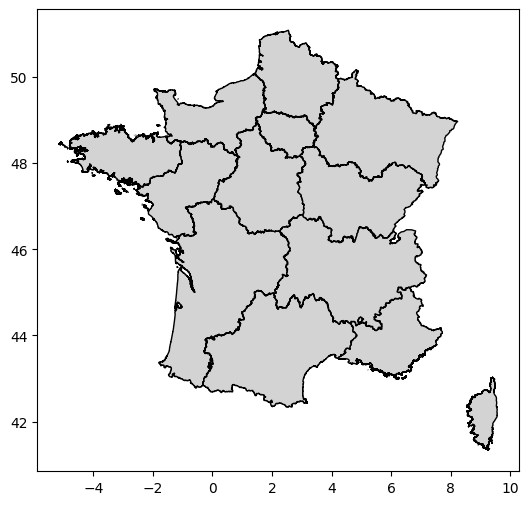

In [22]:
carte_file = 'regions-20180101.shp'
fond_de_carte = gpd.read_file(carte_file)

#convertit le fichier shp complet en un fichier sans dom tom
reg_sans_dom = region_sans_dom(fond_de_carte)

fig, ax = plt.subplots(figsize=(12, 6))
reg_sans_dom.plot(ax=ax, color='lightgray', edgecolor='black')


## Nettoyage et réparation des données


### Fichiers des festivals - colonne date de création


Nous procédons au nettoyage de la colonne 'année', qui comprend non seulement des années, mais également des dates exactes comme "2018-01-01 00:00:00" et des entrées telles que "53e" (supposément pour "53e édition"). Pour les entrées de la colonne 'année' qui sont des valeurs manquantes (NaN) ou qui présentent des formats irréguliers (comme "53e"), nous utilisons la colonne 'décennie', qui indique la décennie de création du festival. Nous choisissons aléatoirement une année au sein de cette décennie pour remplir la colonne 'année'. Lorsque cette colonne 'décennie' contient elle aussi un None, alors la valeur de la colonne "annee_de_cration' associée est égalament fixée comme None. 

Pour les fichiers shapefile et csv, le principe est le même. 

#### Réparation de la colonne "annee_de_creation_du_festival" du fichier csv des données de festival

In [23]:
col_array = np.array(df_festival['annee_de_creation_du_festival'])

# Fonction pour générer un nombre aléatoire dans la décennie
def annee_aleatoire(decennie):
    decennie_str = str(decennie)
    annees = re.findall(r'\d{4}', decennie_str)
    if annees:
        debut_decennie = int(annees[0])
        return np.random.randint(debut_decennie, debut_decennie + 10)
    else:
        return None

# Remplacer les valeurs non valides (qui ne sont pas une année ou une date) par un nombre aléatoire dans la décennie
# On essaye de balayer tous les formats possibles pour une date 
col = np.array([
    float(datetime.strptime(str(date), '%d/%m/%Y %H:%M').year)
    if re.match(r'\d{2}/\d{2}/\d{4} \d{2}:\d{2}$', str(date))
    else float(datetime.strptime(str(date), '%Y-%m-%d %H:%M:%S').year)
    if re.match(r'\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}$', str(date))
    else float(datetime.strptime(str(date), '%Y-%m-%d').year)
    if re.match(r'\d{4}-\d{2}-\d{2}$', str(date))
    else float(date)
    if re.match(r'\d{4}$', str(date))
    else annee_aleatoire(df_festival.at[i, 'decennie_de_creation_du_festival'])
    for i, date in enumerate(col_array)
])
df_festival['annee_creation'] = col
col_None = [x for x in col if x is not None]

print(df_festival[['annee_de_creation_du_festival', 'annee_creation']])

print("nombre de valeurs None dans la colonne année de création:", df_festival['annee_creation'].isna().sum())



     annee_de_creation_du_festival annee_creation
0                             2006         2006.0
1                             2016         2016.0
2                             2009         2009.0
3                             2002         2002.0
4                              NaN           None
...                            ...            ...
7277                           NaN           1995
7278                          2016         2016.0
7279                           NaN           2002
7280                           NaN           None
7281                          2018         2018.0

[7282 rows x 2 columns]
nombre de valeurs None dans la colonne année de création: 369


#### Réparation de la colonne "annee_de_creation_du_festival" du fichier shp des données de festival

In [24]:
shp_festi= shp_festival
print(len(shp_festi))


col_array = np.array(shp_festi['annee_de_cr'])
# Remplacer les valeurs non valides (qui ne sont pas une année ou une date) par un nombre aléatoire dans la décennie
col = np.array([
    float(datetime.strptime(str(date), '%d/%m/%Y %H:%M').year)
    if re.match(r'\d{2}/\d{2}/\d{4} \d{2}:\d{2}$', str(date))
    else float(datetime.strptime(str(date), '%Y-%m-%d %H:%M:%S').year)
    if re.match(r'\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}$', str(date))
    else float(datetime.strptime(str(date), '%Y-%m-%d').year)
    if re.match(r'\d{4}-\d{2}-\d{2}$', str(date))
    else float(date)
    if re.match(r'\d{4}$', str(date))
    else annee_aleatoire(df_festival.at[i, 'decennie_de_creation_du_festival'])
    for i, date in enumerate(col_array)
])
shp_festi['annee_creation'] = col
col_None = [x for x in col if x is not None]
print(shp_festi[['annee_de_cr', 'annee_creation']])

print("nombre de valeurs None dans la colonne année de création:", shp_festi['annee_creation'].isna().sum())



7282
     annee_de_cr annee_creation
0           2006         2006.0
1           2016         2016.0
2           2009         2009.0
3           2002         2002.0
4           None           None
...          ...            ...
7277        None           1995
7278        2016         2016.0
7279        None           2000
7280        None           None
7281        2018         2018.0

[7282 rows x 2 columns]
nombre de valeurs None dans la colonne année de création: 369


Pour les données en fichier shapefile, qui vont servir à produire des cartes de la France afin de visualiser les données, la présence des domtom est superflue. En effet, lorsqu'on affiche les domtom en plus de la métropole, le rendu devient trop petit pour être bien étudié. De plus, on peut considerer que les données concerant les domtoms sont négligeables devant celles concerant la métropole. 

On retire donc les domtom de la base de données.

In [25]:
#On enlève les na de la colonne annee_creation
shp_festi = shp_festi.dropna(subset=['annee_creation'])

#On enlève les domtom
shp_sans_dom = festi_sans_dom_shapefile(shp_festi)
#On convertit la colonne année de création en numéric et on drop les na de cette colonne
shp_sans_dom['annee_de_cr'] = pd.to_numeric(shp_sans_dom['annee_creation'], errors='coerce')

shp_sans_dom.head()

C:\Users\lilou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,nom_du_fest,code_postal,code_insee_,decennie_de,annee_de_cr,identifiant,geometry,annee_creation,discipline_,sous_catego
0,Gamerz,13090.0,200054807,De 2000 Ã 2009,2006.0,None,POINT (5.39857 43.53607),2006.0,"Arts visuels, arts numÃ©riques",None
1,Corsiclassic - festival de musique de chambre,20000.0,242010056,2010 et aprÃ¨s,2016.0,None,POINT (8.70132 41.93479),2016.0,Musique,None
2,Racines de ciel,20000.0,242010056,De 2000 Ã 2009,2009.0,None,POINT (8.70132 41.93479),2009.0,"Livre, littÃ©rature","Fiction (roman, thÃ©Ã¢tre, etc.), Non-fiction ..."
3,Le grand bivouac,73200.0,200068997,De 2000 Ã 2009,2002.0,None,POINT (6.40460 45.66840),2002.0,"CinÃ©ma, audiovisuel",None
5,Illustr'action,7440.0,200041366,2010 et aprÃ¨s,2014.0,None,POINT (4.73413 44.93976),2014.0,"Arts visuels, arts numÃ©riques",None


### Fichier du recensement

On a importé une base de données au niveau communal pour avoir des informations sur la population des communes dans lesquelles se déroulent le festival et plus tard espérer trouver un lien entre l'emplacement de ces derniers et leurs caractéristiques. La base est très volumineuse, on conserve et renomme seulement les colonnes intéressantes dans cette base.

In [26]:
nouvelles_colonnes = {
    'Chiffres détaillés – Évolution et structure de la population': 'code_insee_commune', 
    'Unnamed: 1': 'Région',
    'Unnamed: 2': 'Département',
    'Unnamed: 3': 'Libellé géographique', 
    'Unnamed: 4': 'Population en 2019 (princ)',
    'Unnamed: 5': 'Pop 0-14 ans en 2019 (princ)',
    'Unnamed: 6': 'Pop 15-29 ans en 2019 (princ)',
    'Unnamed: 7': 'Pop 30-44 ans en 2019 (princ)',
    'Unnamed: 8': 'Pop 45-59 ans en 2019 (princ)',
    'Unnamed: 9': 'Pop 60-74 ans en 2019 (princ)', 
    'Unnamed: 10': 'Pop 75-89 ans en 2019 (princ)',
    'Unnamed: 11': 'Pop 90 ans ou plus en 2019 (princ)',  
    'Unnamed: 54': 'Pop 15 ans ou plus en 2019 (compl)',
    'Unnamed: 55': 'Pop 15 ans ou plus Agriculteurs exploitants en 2019 (compl)', 
    'Unnamed: 56': 'Pop 15 ans ou plus Artisans, Comm., Chefs entr. en 2019 (compl)', 
    'Unnamed: 57': 'Pop 15 ans ou plus Cadres, Prof. intel. sup. en 2019 (compl)', 
    'Unnamed: 58': 'Pop 15 ans ou plus Prof. intermédiaires  en 2019 (compl)', 
    'Unnamed: 59': 'Pop 15 ans ou plus Employés en 2019 (compl)', 
    'Unnamed: 60': 'Pop 15 ans ou plus Ouvriers en 2019 (compl)', 
    'Unnamed: 61': 'Pop 15 ans ou plus Retraités en 2019 (compl)', 
    'Unnamed: 62': 'Pop 15 ans ou plus Autres en 2019 (compl)'
    }

df_csv = df_csv.rename(columns=nouvelles_colonnes)


# Épurer la base de données (conserver que les colonnes et lignes utiles, arrondir population...)

colonnes_a_conserver = ['code_insee_commune', 'Région', 'Département', 
                        'Libellé géographique', 'Population en 2019 (princ)', 
                        'Pop 0-14 ans en 2019 (princ)', 'Pop 15-29 ans en 2019 (princ)', 'Pop 30-44 ans en 2019 (princ)', 
                        'Pop 45-59 ans en 2019 (princ)', 'Pop 60-74 ans en 2019 (princ)', 'Pop 75-89 ans en 2019 (princ)', 
                        'Pop 90 ans ou plus en 2019 (princ)', 'Pop 15 ans ou plus en 2019 (compl)', 
                        'Pop 15 ans ou plus Agriculteurs exploitants en 2019 (compl)', 'Pop 15 ans ou plus Artisans, Comm., Chefs entr. en 2019 (compl)', 
                        'Pop 15 ans ou plus Cadres, Prof. intel. sup. en 2019 (compl)', 'Pop 15 ans ou plus Prof. intermédiaires  en 2019 (compl)', 
                        'Pop 15 ans ou plus Employés en 2019 (compl)', 'Pop 15 ans ou plus Ouvriers en 2019 (compl)', 'Pop 15 ans ou plus Retraités en 2019 (compl)', 
                        'Pop 15 ans ou plus Autres en 2019 (compl)']



df_csv = df_csv[colonnes_a_conserver]

df_communes = df_csv.drop(index=[0,1,2]).reset_index(drop=True)

# Transformer en int les éléments des colonnes numériques (qui ont des types ≠)
for colonne in df_communes.columns[4:]:
    df_communes[colonne][2:] = pd.to_numeric(df_communes[colonne][2:], errors='coerce').round().astype('Int64')

df_communes.head()

,code_insee_commune,Région,Département,Libellé géographique,Population en 2019 (princ),Pop 0-14 ans en 2019 (princ),Pop 15-29 ans en 2019 (princ),Pop 30-44 ans en 2019 (princ),Pop 45-59 ans en 2019 (princ),Pop 60-74 ans en 2019 (princ),...,Pop 90 ans ou plus en 2019 (princ),Pop 15 ans ou plus en 2019 (compl),Pop 15 ans ou plus Agriculteurs exploitants en 2019 (compl),"Pop 15 ans ou plus Artisans, Comm., Chefs entr. en 2019 (compl)","Pop 15 ans ou plus Cadres, Prof. intel. sup. en 2019 (compl)",Pop 15 ans ou plus Prof. intermédiaires en 2019 (compl),Pop 15 ans ou plus Employés en 2019 (compl),Pop 15 ans ou plus Ouvriers en 2019 (compl),Pop 15 ans ou plus Retraités en 2019 (compl),Pop 15 ans ou plus Autres en 2019 (compl)
0,Code géographique,Région,Département,Libellé géographique,Population en 2019 (princ),Pop 0-14 ans en 2019 (princ),Pop 15-29 ans en 2019 (princ),Pop 30-44 ans en 2019 (princ),Pop 45-59 ans en 2019 (princ),Pop 60-74 ans en 2019 (princ),...,Pop 90 ans ou plus en 2019 (princ),Pop 15 ans ou plus en 2019 (compl),Pop 15 ans ou plus Agriculteurs exploitants en...,"Pop 15 ans ou plus Artisans, Comm., Chefs entr...","Pop 15 ans ou plus Cadres, Prof. intel. sup. e...",Pop 15 ans ou plus Prof. intermédiaires en 20...,Pop 15 ans ou plus Employés en 2019 (compl),Pop 15 ans ou plus Ouvriers en 2019 (compl),Pop 15 ans ou plus Retraités en 2019 (compl),Pop 15 ans ou plus Autres en 2019 (compl)
1,CODGEO,REG,DEP,LIBGEO,P19_POP,P19_POP0014,P19_POP1529,P19_POP3044,P19_POP4559,P19_POP6074,...,P19_POP90P,C19_POP15P,C19_POP15P_CS1,C19_POP15P_CS2,C19_POP15P_CS3,C19_POP15P_CS4,C19_POP15P_CS5,C19_POP15P_CS6,C19_POP15P_CS7,C19_POP15P_CS8
2,01001,84,01,L'Abergement-Clémenciat,779,159,102,132,194,131,...,5,619,16,20,76,98,101,127,153,30
3,01002,84,01,L'Abergement-de-Varey,256,59,30,74,39,35,...,2,205,0,21,16,26,42,11,67,22
4,01004,84,01,Ambérieu-en-Bugey,14134,2642,3077,2730,2391,2054,...,195,11509,3,327,784,1890,1891,2002,2763,1848


On crée une nouvelle colonne qui nous donne la tranche d'âge majoritaire dans chaque commune, c'est un proxy de moyenne d'âge des habitants. L'âge de la population est une variable à partir de laquelle il nous semble pertinent d'étudier le lien entre les festivals et leur commune d'accueil : notre hypothèse est que si une commune est jeune, elle accueillera plus de festivals "de jeunes" (le proxy de cela sera les festivals de musique électro)
On fait en sorte de numéroter les différentes tranches d'âge afin de pouvoir les comparer entre elles plus tard

In [27]:
tranches_age = ['Pop 0-14 ans en 2019 (princ)', 'Pop 15-29 ans en 2019 (princ)', 
                'Pop 30-44 ans en 2019 (princ)', 'Pop 45-59 ans en 2019 (princ)', 
                'Pop 60-74 ans en 2019 (princ)', 'Pop 75-89 ans en 2019 (princ)', 
                'Pop 90 ans ou plus en 2019 (princ)']

df_communes[tranches_age] = df_communes[tranches_age].apply(pd.to_numeric, errors='coerce')



tranchemax = df_communes[tranches_age].idxmax(axis=1)

tranchemax = df_communes[tranches_age].idxmax(axis=1).fillna('Nan')

df_communes['numerotation_tranche'] = tranchemax.apply(lambda x: tranches_age.index(x) if x != 'Nan' else pd.NA)

df_communes['numerotation_tranche'] = df_communes['numerotation_tranche'].astype('Int64') 

mapping_tranches_age = {
    0: '0 - Pop 0-14 ans en 2019 (princ)',
    1: '1 - Pop 15-29 ans en 2019 (princ)',
    2: '2 - Pop 30-44 ans en 2019 (princ)',
    3: '3 - Pop 45-59 ans en 2019 (princ)',
    4: '4 - Pop 60-74 ans en 2019 (princ)',
    5: '5 - Pop 75-89 ans en 2019 (princ)',
    6: '6 - Pop 90 ans ou plus en 2019 (princ)'
}

df_communes['tranche_age_majoritaire'] = (
    df_communes['numerotation_tranche'].map(mapping_tranches_age).astype(str) 
)



C:\Users\lilou\AppData\Local\Temp\ipykernel_17220\3350751876.py:10: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  tranchemax = df_communes[tranches_age].idxmax(axis=1)
C:\Users\lilou\AppData\Local\Temp\ipykernel_17220\3350751876.py:12: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  tranchemax = df_communes[tranches_age].idxmax(axis=1).fillna('Nan')


De la même manière, on crée une colonne de PCS "moyenne" (la PCS avec la plus grande part de population)

In [28]:
# Pareil avec les PCS 
PCS = ['Pop 15 ans ou plus Agriculteurs exploitants en 2019 (compl)', 'Pop 15 ans ou plus Artisans, Comm., Chefs entr. en 2019 (compl)', 
                'Pop 15 ans ou plus Ouvriers en 2019 (compl)', 'Pop 15 ans ou plus Employés en 2019 (compl)',
                'Pop 15 ans ou plus Prof. intermédiaires  en 2019 (compl)', 'Pop 15 ans ou plus Cadres, Prof. intel. sup. en 2019 (compl)']
# On laisse délibéremment de côté retraités et autres 

df_communes[PCS] = df_communes[PCS].apply(pd.to_numeric, errors='coerce')


PCSmax = df_communes[PCS].idxmax(axis=1)

PCSmax = df_communes[PCS].idxmax(axis=1).fillna('Nan')

df_communes['numerotation_PCS'] = PCSmax.apply(lambda x: PCS.index(x) if x != 'Nan' else pd.NA)

df_communes['numerotation_PCS'] = df_communes['numerotation_PCS'].astype('Int64') 

mapping_PCS = {
    0: '0 - Agriculteurs',
    1: '1 - ACCE (Artisans...)',
    2: '2 - Ouvriers',
    3: '3 - Employés',
    4: '4 - Prof. Intermédiaires',
    5: '5 - Cadres',
}

df_communes['PCS_maj'] = (
    df_communes['numerotation_PCS'].map(mapping_PCS).astype(str) 
)


df_communes.head()

C:\Users\lilou\AppData\Local\Temp\ipykernel_17220\2609476832.py:10: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  PCSmax = df_communes[PCS].idxmax(axis=1)
C:\Users\lilou\AppData\Local\Temp\ipykernel_17220\2609476832.py:12: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  PCSmax = df_communes[PCS].idxmax(axis=1).fillna('Nan')


,code_insee_commune,Région,Département,Libellé géographique,Population en 2019 (princ),Pop 0-14 ans en 2019 (princ),Pop 15-29 ans en 2019 (princ),Pop 30-44 ans en 2019 (princ),Pop 45-59 ans en 2019 (princ),Pop 60-74 ans en 2019 (princ),...,"Pop 15 ans ou plus Cadres, Prof. intel. sup. en 2019 (compl)",Pop 15 ans ou plus Prof. intermédiaires en 2019 (compl),Pop 15 ans ou plus Employés en 2019 (compl),Pop 15 ans ou plus Ouvriers en 2019 (compl),Pop 15 ans ou plus Retraités en 2019 (compl),Pop 15 ans ou plus Autres en 2019 (compl),numerotation_tranche,tranche_age_majoritaire,numerotation_PCS,PCS_maj
0,Code géographique,Région,Département,Libellé géographique,Population en 2019 (princ),NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Pop 15 ans ou plus Retraités en 2019 (compl),Pop 15 ans ou plus Autres en 2019 (compl),<NA>,nan,<NA>,nan
1,CODGEO,REG,DEP,LIBGEO,P19_POP,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,C19_POP15P_CS7,C19_POP15P_CS8,<NA>,nan,<NA>,nan
2,01001,84,01,L'Abergement-Clémenciat,779,159.0,102.0,132.0,194.0,131.0,...,76.0,98.0,101.0,127.0,153,30,3,3 - Pop 45-59 ans en 2019 (princ),2,2 - Ouvriers
3,01002,84,01,L'Abergement-de-Varey,256,59.0,30.0,74.0,39.0,35.0,...,16.0,26.0,42.0,11.0,67,22,2,2 - Pop 30-44 ans en 2019 (princ),3,3 - Employés
4,01004,84,01,Ambérieu-en-Bugey,14134,2642.0,3077.0,2730.0,2391.0,2054.0,...,784.0,1890.0,1891.0,2002.0,2763,1848,1,1 - Pop 15-29 ans en 2019 (princ),2,2 - Ouvriers


### Fusion des bases de données des festival (csv) et du recensement

On fusionne le dataframe des festivals et celui des communes pour pouvoir faire des statistiques descriptives sur une seule et même dataframe.

In [29]:
# Fusionner les DataFrames sur la colonne 'Code commune'
df_merged = pd.merge(df_festival, df_communes, on='code_insee_commune', how='left')

# Afficher les premières lignes du DataFrame résultant
df_merged.head()

,nom_du_festival,envergure_territoriale,region_principale_de_deroulement,departement_principal_de_deroulement,commune_principale_de_deroulement,code_postal_de_la_commune_principale_de_deroulement,code_insee_commune,code_insee_epci_collage_en_valeur,libelle_epci_collage_en_valeur,numero_de_voie,...,"Pop 15 ans ou plus Cadres, Prof. intel. sup. en 2019 (compl)",Pop 15 ans ou plus Prof. intermédiaires en 2019 (compl),Pop 15 ans ou plus Employés en 2019 (compl),Pop 15 ans ou plus Ouvriers en 2019 (compl),Pop 15 ans ou plus Retraités en 2019 (compl),Pop 15 ans ou plus Autres en 2019 (compl),numerotation_tranche,tranche_age_majoritaire,numerotation_PCS,PCS_maj
0,Gamerz,Départementale,Provence-Alpes-Côte d'Azur,Bouches-du-Rhône,Aix-en-Provence,13090,13001,200054807,Métropole d'Aix-Marseille-Provence,1,...,20110.0,18211.0,17305.0,7646.0,27613,30044,1,1 - Pop 15-29 ans en 2019 (princ),5,5 - Cadres
1,Corsiclassic - festival de musique de chambre,NaN,Corse,Corse-du-Sud,Ajaccio,20000,2A004,242010056,CA du Pays Ajaccien,NaN,...,3457.0,7751.0,12040.0,6488.0,15565,11656,2,2 - Pop 30-44 ans en 2019 (princ),3,3 - Employés
2,Racines de ciel,NaN,Corse,Corse-du-Sud,Ajaccio,20000,2A004,242010056,CA du Pays Ajaccien,50-52,...,3457.0,7751.0,12040.0,6488.0,15565,11656,2,2 - Pop 30-44 ans en 2019 (princ),3,3 - Employés
3,Le grand bivouac,Intercommunale,Auvergne-Rhône-Alpes,Savoie,Albertville,73200,73011,200068997,CA Arlysère,88 bis,...,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,<NA>,NaN
4,Festival Acthea,NaN,Occitanie,Tarn,Albi,81000,81004,248100737,CA de l'Albigeois (C2A),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,<NA>,NaN


# PARTIE 2 - ANALYSE DESCRIPTIVE ET REPRESENTATION GRAPHIQUE


## Etude de la popultion des communes


In [30]:
# Tableau de fréquence des PCS majoritaires (nmb de communes avec telle PCS comme majoritaire)

print(df_merged['PCS_maj'].value_counts())

PCS_maj
3 - Employés                2140
4 - Prof. Intermédiaires     507
2 - Ouvriers                 460
5 - Cadres                   390
1 - ACCE (Artisans...)        20
0 - Agriculteurs              14
Name: count, dtype: int64


In [31]:
print(df_merged['tranche_age_majoritaire'].value_counts())

tranche_age_majoritaire
3 - Pop 45-59 ans en 2019 (princ)    1234
4 - Pop 60-74 ans en 2019 (princ)     943
1 - Pop 15-29 ans en 2019 (princ)     936
0 - Pop 0-14 ans en 2019 (princ)      207
2 - Pop 30-44 ans en 2019 (princ)     205
5 - Pop 75-89 ans en 2019 (princ)       6
Name: count, dtype: int64


## Etude des différents festivals

### Dates de créations

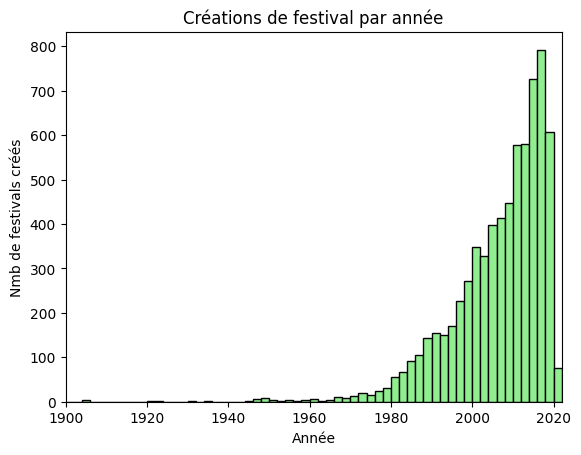

In [32]:

#On fzit un histogramme de la création des festivals par année 

plt.hist(col_None, bins=np.arange(1900, max(col_None) + 2, 2), color='lightgreen', edgecolor='black')
plt.xlabel('Année')
plt.ylabel('Nmb de festivals créés')
plt.title('Créations de festival par année')
plt.xlim(1900, max(col_None))
plt.show()

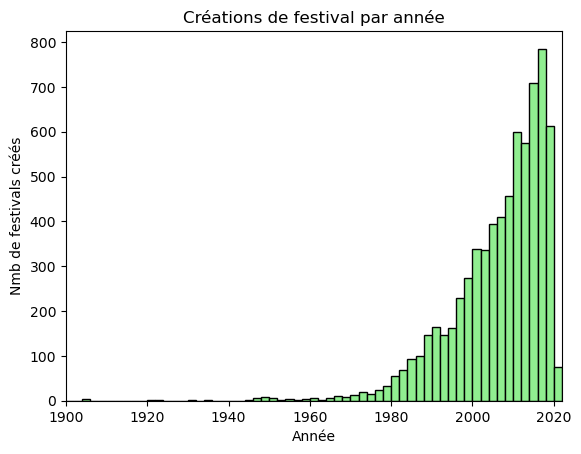

### Types de festivals

In [33]:
print(df_festival['discipline_dominante'].value_counts())

discipline_dominante
Musique                          3228
Spectacle vivant                 1633
Livre, littérature                892
Cinéma, audiovisuel               685
Pluridisciplinaire                462
Arts visuels, arts numériques     382
Name: count, dtype: int64


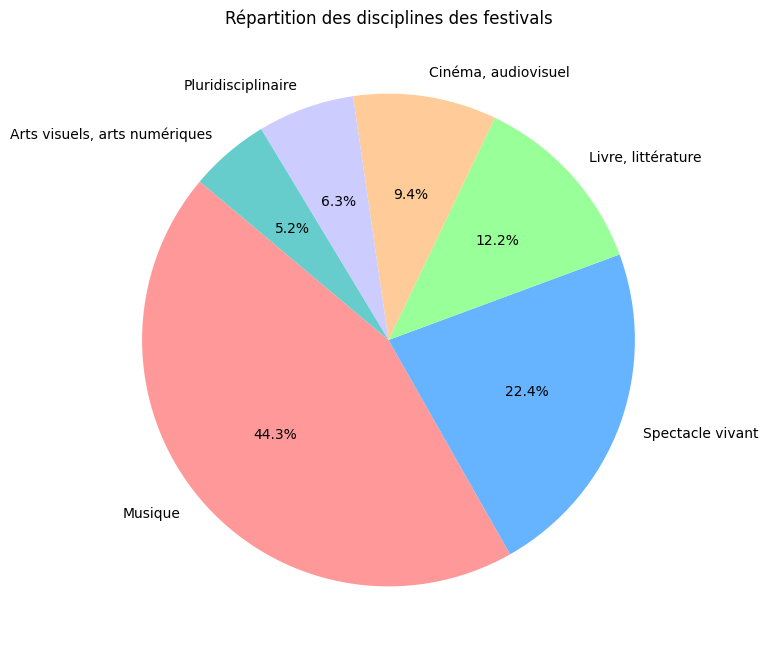

In [34]:
discipline_dom = df_festival['discipline_dominante'].value_counts()

plt.figure(figsize=(8,8))
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#CCCCFF', '#66CCCC']
plt.pie(discipline_dom, labels= discipline_dom.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Répartition des disciplines des festivals')
plt.show()

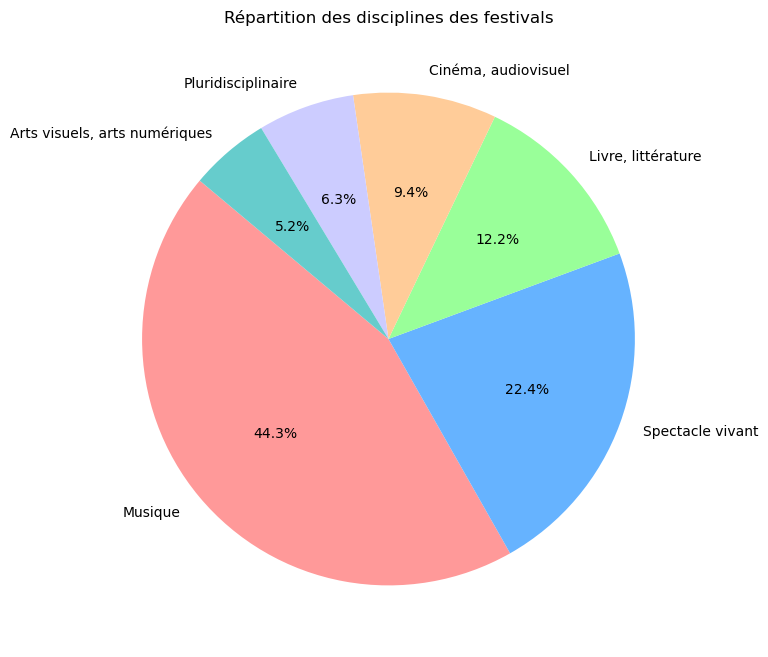

La majorité des festivals sont des festivals de musique.
Concentrons-nous sur la colonne sous catégorie de musique cnm qui donne, pour chaque de festival de musique, son "sous-style" défini selon les libéllés du Conservatoire National de Musique. 

Les catégories flous (musiques sans distinction esthétique, pluridisciplinaire) ou celles qui sont à la marge de la discipline (humour, comédie musicale...) sont placées dans autres pour clarifier la lecture des statistiques descriptives en conservant le même niveau de pertinence.

In [35]:
mapping_sous_mus = {
    '1- Chanson' : 'Chanson',
    '02- Musiques amplifiées ou électroniques' : 'Électro',
    '03- Jazz, blues et musiques improvisées' : 'Jazz, blues',
    '04- Musiques traditionnelles et du monde' : 'Musique du monde',
    '05- Humour': 'Autres',
    '07- Musiques actuelles sans distinction': 'Musiques actuelles',
    '08- Musiques (sans distinction esthétique)' : 'Sans sous catégorie',
    '09- Pluridisciplinaire': 'Pluridisciplinaire',
    '10- Comédie musicale': 'Autres',
    '11- Musique classique, lyrique, contemporaine, autres': 'Musique classique',
    '13- Autres spectacles (théâtre, arts de la rue et du cirque...)': 'Autres',
    '14- Autres disciplines culturelles (arts plastiques, cinéma, photographie, livre...)': 'Autres',
    '15- Fête de la ville, feria, fête votive, fête de la pomme, etc.': 'Fêtes de villes ou villages'
}


Nombre de valeurs non-NaN dans 'sous_categorie_musique_cnm': 958


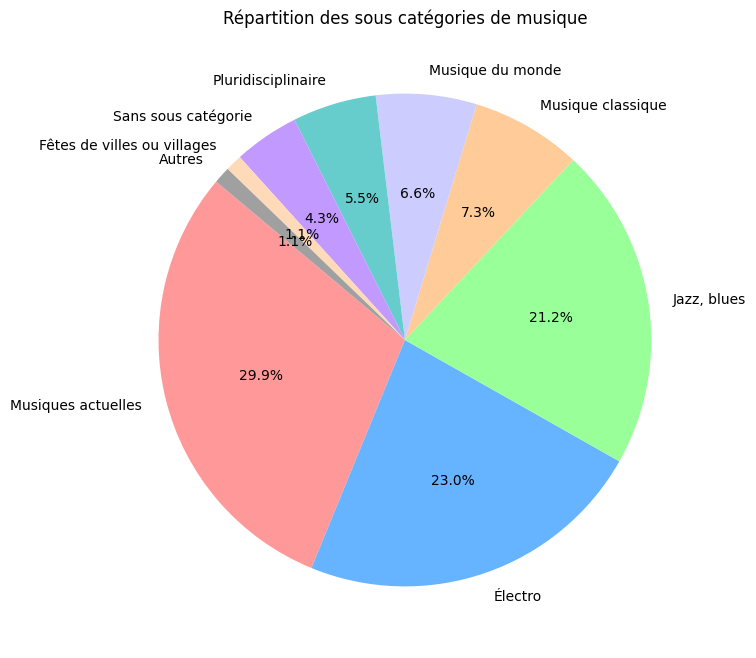

In [36]:
musique_dom = df_festival['sous_categorie_musique_cnm'].map(mapping_sous_mus).value_counts()

nombre_non_nan = df_festival['sous_categorie_musique_cnm'].notna().sum()
print(f"Nombre de valeurs non-NaN dans 'sous_categorie_musique_cnm': {nombre_non_nan}")

colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#CCCCFF', 
          '#66CCCC', '#c299ff', '#FFDAB9', '#A0A0A0']
plt.figure(figsize=(8,8))
plt.pie(musique_dom, colors=colors, labels= musique_dom.index, autopct='%1.1f%%', startangle=140)
plt.title('Répartition des sous catégories de musique')
plt.show()

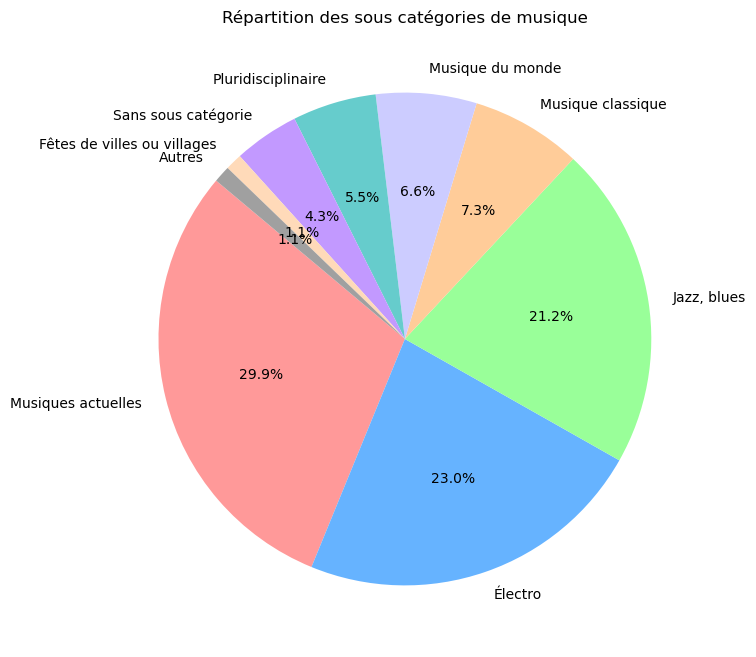

## Lien entre l'âge de la commune d'accueil et le type de musique des festivals

On cherche à comparer la tranche d'âge majoritaire dans les communes accueillant un festival de musique classique et celle dans les communes accueillant un festival de musique électro. 

In [37]:
festivals_musique_classique = df_merged[df_merged['sous_categorie_musique_cnm'] == '11- Musique classique, lyrique, contemporaine, autres']
festivals_electro = df_merged[df_merged['sous_categorie_musique_cnm'] == '02- Musiques amplifiées ou électroniques']


print(df_merged['tranche_age_majoritaire'].value_counts())
print(festivals_musique_classique['tranche_age_majoritaire'].value_counts())
print(festivals_electro['tranche_age_majoritaire'].value_counts())

tranche_age_majoritaire
3 - Pop 45-59 ans en 2019 (princ)    1234
4 - Pop 60-74 ans en 2019 (princ)     943
1 - Pop 15-29 ans en 2019 (princ)     936
0 - Pop 0-14 ans en 2019 (princ)      207
2 - Pop 30-44 ans en 2019 (princ)     205
5 - Pop 75-89 ans en 2019 (princ)       6
Name: count, dtype: int64
tranche_age_majoritaire
4 - Pop 60-74 ans en 2019 (princ)    14
1 - Pop 15-29 ans en 2019 (princ)    12
3 - Pop 45-59 ans en 2019 (princ)     8
2 - Pop 30-44 ans en 2019 (princ)     1
0 - Pop 0-14 ans en 2019 (princ)      1
Name: count, dtype: int64
tranche_age_majoritaire
1 - Pop 15-29 ans en 2019 (princ)    32
3 - Pop 45-59 ans en 2019 (princ)    28
4 - Pop 60-74 ans en 2019 (princ)    22
0 - Pop 0-14 ans en 2019 (princ)      7
2 - Pop 30-44 ans en 2019 (princ)     3
5 - Pop 75-89 ans en 2019 (princ)     1
Name: count, dtype: int64


On voit que la tranche d'âge majoritraire dans la plupart des communes est la tranche d'âge 45-59 ans. Tandis que les festivals de musique classique sont dans des communes où en moyenne, la tranche d'âge majoritaire est plus âgée (60-74 ans). Et 15-29 ans pour les communes dans lesquelles il y a de la musique électro. 

Mais pas très fort car en effectif, cela se joue à 2-4 communes...

De la même manière, on regarde en fonctions des PCS

In [38]:
print(df_merged['PCS_maj'].value_counts())
print(festivals_musique_classique['PCS_maj'].value_counts())
print(festivals_electro['PCS_maj'].value_counts())

PCS_maj
3 - Employés                2140
4 - Prof. Intermédiaires     507
2 - Ouvriers                 460
5 - Cadres                   390
1 - ACCE (Artisans...)        20
0 - Agriculteurs              14
Name: count, dtype: int64
PCS_maj
3 - Employés                23
5 - Cadres                   5
2 - Ouvriers                 5
4 - Prof. Intermédiaires     3
Name: count, dtype: int64
PCS_maj
3 - Employés                50
2 - Ouvriers                18
4 - Prof. Intermédiaires    15
5 - Cadres                  10
Name: count, dtype: int64


Nous obtenons des résultats à prendre avec beaucop de modération puisque les effectifs sont grandement réduit lorsque l'on considère qu'un seul type de musique et sont trop petits pour tirer de vraies conclusions. 

D'ailleurs on a un rapport d'environ 1/5 entre le nombre de communes dominées par des cadres et par des employés dans les trois cas. **Le résultat le plus intéressant est sans doute que, dans le cas des festivals de musique électroniques on a un rapport de 1/3 entre les communes à dominante ouvrières et celles à dominante employé** tandis qu'on a aussi 1/5 dans le cas des festivals de musique classique et en général. 

In [39]:
print(df_merged['region_principale_de_deroulement'].value_counts())

region_principale_de_deroulement
Auvergne-Rhône-Alpes          947
Provence-Alpes-Côte d'Azur    942
Occitanie                     903
Nouvelle-Aquitaine            828
Île-de-France                 654
Bretagne                      590
Grand Est                     468
Bourgogne-Franche-Comté       442
Centre-Val de Loire           357
Hauts-de-France               338
Pays de la Loire              332
Normandie                     267
Corse                          69
Guadeloupe                     44
La Réunion                     41
Guyane                         19
Martinique                     15
Mayotte                         9
Polynésie française             7
Nouvelle-Calédonie              5
Saint-Barthélemy                3
Saint-Pierre-et-Miquelon        2
Name: count, dtype: int64


## Observation visuelle de l'emplacement des festivals

On cherche maintenant à observer la localisation des festivals dans l'espace. On observe tout d'abord si la localisation de tous les festivals, peut importe leur type, suit une certaine distribution dans l'espace.

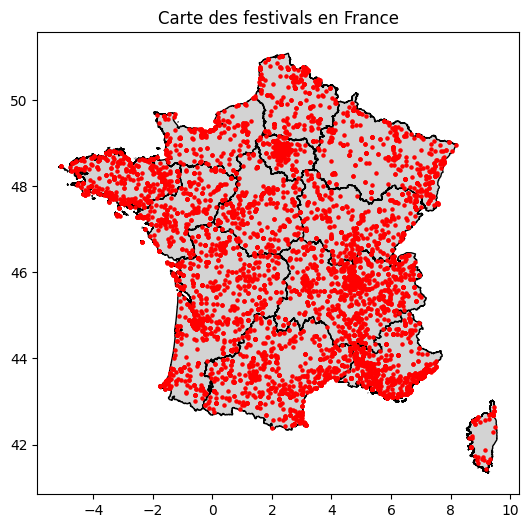

In [40]:
fond_de_carte = lecture_fichier("carte_region", "shp")
reg_sans_dom = region_sans_dom(fond_de_carte)


#on print la carte de tous les festivals
carte_fest(shp_sans_dom, reg_sans_dom, 'Carte des festivals en France')

On voit que des zones sont plus densément peuplées de festivals que d'autres. En effet, la région parisienne, la cote sud de la bretagne, les alentours de Lyon et sur une ligne qui sembe s'étirer de Lyon jusqu'à Marseille et à toute la cote d'Azur. 

On affiche les cartes des emplacements des festivals selon leur disciline dominante, parmis Musique, Arts visuels et numériques, Cinéma et audiovisuel, Spectacle vivant, Livre et littérature et Pluridiscipinaire.

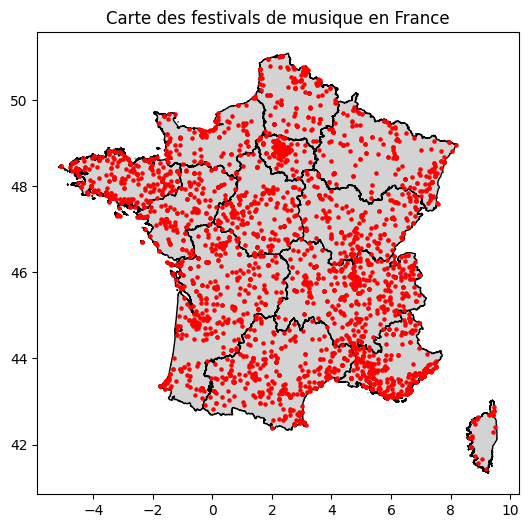

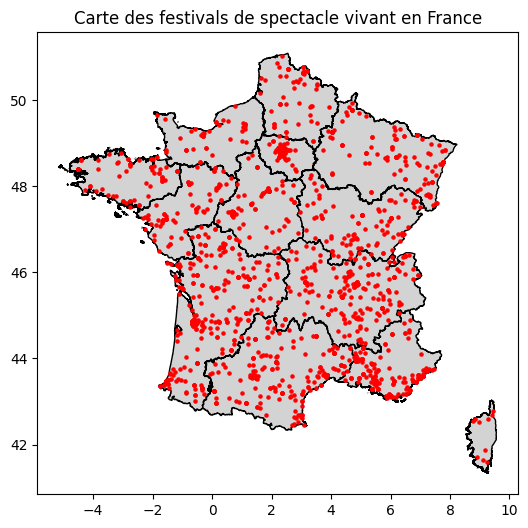

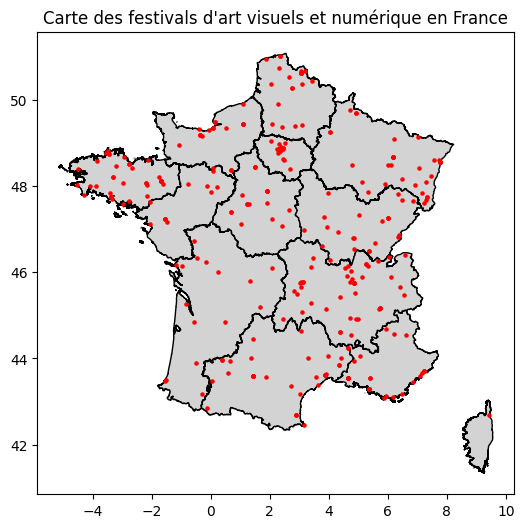

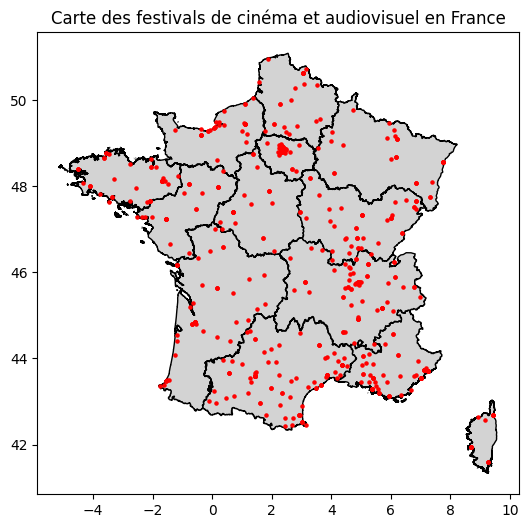

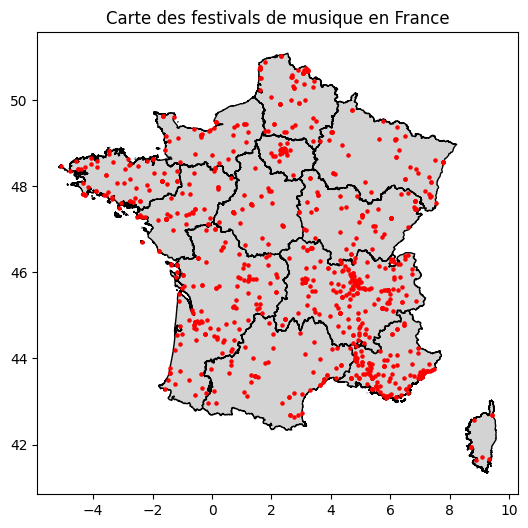

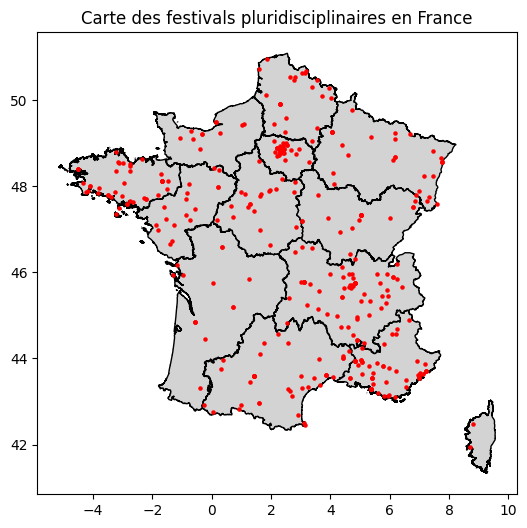

In [42]:
fest_musique = shp_sans_dom[shp_sans_dom['discipline_'] == 'Musique']
carte_fest(fest_musique, reg_sans_dom, "Carte des festivals de musique en France")

fest_spectacle = shp_sans_dom[shp_sans_dom['discipline_'] == 'Spectacle vivant']
carte_fest(fest_spectacle, reg_sans_dom, "Carte des festivals de spectacle vivant en France")

fest_art_visu = shp_sans_dom[shp_sans_dom['discipline_'] == 'Arts visuels, arts numÃ©riques']
carte_fest(fest_art_visu, reg_sans_dom, "Carte des festivals d'art visuels et numérique en France")

fest_art_num = shp_sans_dom[shp_sans_dom['discipline_'] == 'CinÃ©ma, audiovisuel']
carte_fest(fest_art_num, reg_sans_dom, "Carte des festivals de cinéma et audiovisuel en France")

fest_livre = shp_sans_dom[shp_sans_dom['discipline_'] == 'Livre, littÃ©rature']
carte_fest(fest_livre, reg_sans_dom, "Carte des festivals de musique en France")

fest_pluri = shp_sans_dom[shp_sans_dom['discipline_'] == 'Pluridisciplinaire']
carte_fest(fest_pluri, reg_sans_dom, "Carte des festivals pluridisciplinaires en France")


Il semble que la distribution varie peut selon la discipline du festival. Les zones qui présentaient une forte concentration de festivals toutes disciplines confondus sont également celles qui sont les plus représentées lorsqu'on affiche les festivals d'une seule discipline. 

 Essayons à présent de voir si deux styles de musiques opposés comme la musique clasique et la musique éléctro observent des distributions spatiales différentes. 

#### Musique classique

Le fichier shapefile est rempli de mention de sous catégories toutes différentes et comprenant différentes sous catégories, comme on peut le voir sur la sortie ci-dessous. Contrairement, il n'y a pas de sous catégorie cnm. 

In [49]:
print(shp_sans_dom['sous_catego'].unique())

[None
 'Fiction (roman, thÃ©Ã¢tre, etc.), Non-fiction (documentaire, autobiographie, essai, rÃ©cit, etc.), PoÃ©sie, polar, science-fiction'
 'Bande dessinÃ©e, comics, manga, fiction (roman, thÃ©Ã¢tre, etc.), Non-fiction (documentaire, autobiographie, essai, rÃ©cit, etc.), PoÃ©sie, polar, science-fiction'
 'Conte' 'Fiction' 'carnet et littÃ©rature de voyage' 'Polar'
 'Bande dessinÃ©e, comics, manga, fiction (roman, thÃ©Ã¢tre, etc.), PoÃ©sie, polar'
 'PoÃ©sie' 'Pas de sous catÃ©gorie' 'russophonie et francophonie'
 'Albums jeunesse' 'Bande dessinÃ©e, comics, manga'
 'LittÃ©rature performative'
 'Bande dessinÃ©e, comics, manga, Fiction (roman, thÃ©Ã¢tre, etc.), Non-fiction (documentaire, autobiographie, essai, rÃ©cit, etc.), PoÃ©sie, Album jeunesse'
 'RentrÃ©e littÃ©raire littÃ©rature generale' 'Jeunesse' 'Bande-dessinÃ©e'
 'Festival jeune public et famille'
 'Fiction (roman, thÃ©Ã¢tre, etc.), littÃ©rature jeunesse'
 'Manga et culture asiatique' 'Bande dessinÃ©e'
 'Polar, Bande dessinÃ©e,

On va choisir tous les festivals dont la mention de la sous catégorie contient les termes suivants: "classique", "savante", "lyrique".

m_classique
0    6750
1       6
Name: count, dtype: int64


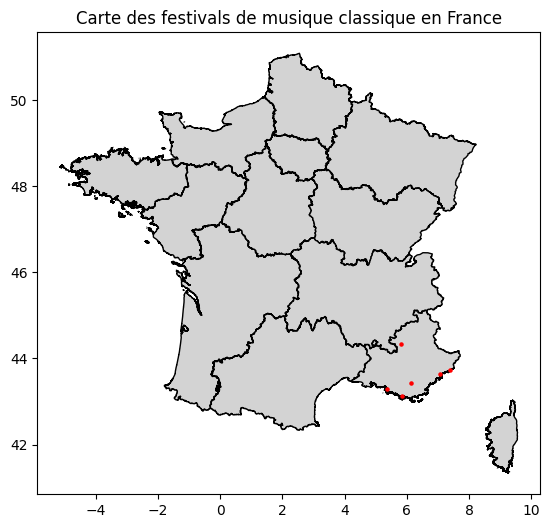

In [50]:

# Ajouter une colonne 'm_classique' initialisée à 0
shp_sans_dom['m_classique'] = 0

# Définir les termes à rechercher
mots_cles = ['lyrique', 'savant', 'classique', "jazz"]

# Fonction pour vérifier la présence des termes dans une chaîne
def check_mot_cle(sub_cat):
    return any(mot in sub_cat.lower() for mot in mots_cles) if sub_cat else False

# Appliquer la fonction à la colonne 'sous_categorie' et mettre à jour 'm_classique'
shp_sans_dom['m_classique'] = shp_sans_dom['sous_catego'].apply(check_mot_cle).astype(int)

print(shp_sans_dom['m_classique'].value_counts())

fest_musique_calssique = shp_sans_dom[shp_sans_dom['m_classique'] ==  1]
carte_fest(fest_musique_calssique, reg_sans_dom, "Carte des festivals de musique classique en France")

#### Musique éléctro

# PARTIE 3 - MODELISATION


# Modelisation
## A) Carte



On choisit de modéliser la création des festivals en fonction du temps, et de façon visuelle. Pour ça, on va creer un gif qui répresente les festivals crés chaque année et leur emplacement en France métropolitaine, à raison de deux années par secondes. Dans un premier temps, on a creer une fonction qui va afficher une carte des festivals créés une certaine année, et on pourra creer une sorte de film d'animation à l'aide de toutes ces cartes.

In [43]:
def carte_1_an_bis(emplacements_festivals, fond_de_carte, annee):
    # On enlève toutes les lignes dont la valeur de la colonne 'code_insee_commune' est NaN

    # On enlève les lignes dont la date de création est différente de celle donnée en argument
    emplacements_festivals = emplacements_festivals[emplacements_festivals['annee_creation'] == annee]

    if not emplacements_festivals.empty:
        fig, ax = plt.subplots(figsize=(12, 6))

        # Afficher le fond de carte
        fond_de_carte.plot(ax=ax, color='lightgray', edgecolor='black')

        # Afficher les emplacements des festivals
        emplacements_festivals.plot(ax=ax, color='red', marker='o', markersize=5)

        # Ajouter un titre à la carte
        plt.title(f'Carte des Festivals en France créés en {annee}')

        # Afficher la carte
        plt.show()

        return

    # Si aucuns festivals n'ont été créés cette année, afficher seulement le fond de carte
    fig, ax = plt.subplots(figsize=(12, 6))
    fond_de_carte.plot(ax=ax, color='lightgray', edgecolor='black')
    plt.title(f'Aucun festival créé en France en {annee}')
    plt.show()
    return

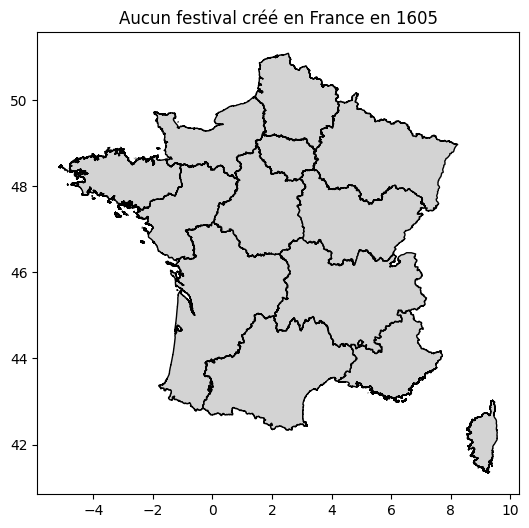

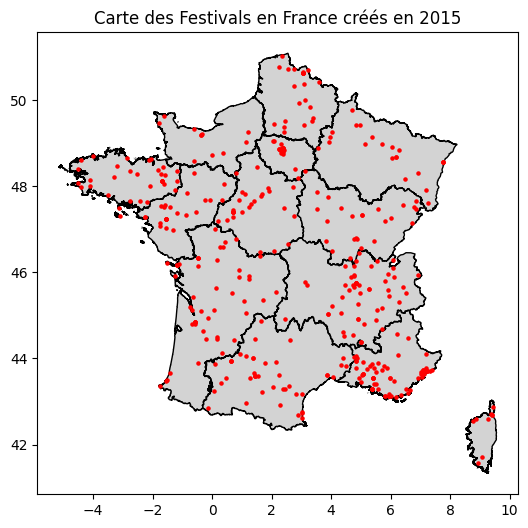

In [44]:
carte_1_an_bis(shp_sans_dom, reg_sans_dom, 1605)
carte_1_an_bis(shp_sans_dom, reg_sans_dom, 2015)

Dans le but de creer notre animation, on optimise la création du fond de carte et la fonction de création de carte.

In [45]:
#Génere le fond de carte tout seul
def make_fond_carte(fond_de_carte):
    # défini la figure
    fig, ax = plt.subplots(figsize=(12, 6))
    # plot le fonde de carte de la France
    fond_de_carte.plot(ax=ax, color='lightgray', edgecolor='black')
    return ax


#Génere une carte de la france avec les emplacements des festivals 
# Cette fonction marche si on a déja convertit les valeurs en numérique et remplacé toutes les valeurs qui ne sont pas numériques par des NaN
def carte(emplacements_festivals, ax, annee):
    # On enlève les lignes dont la date de création est différente de celle donnée en argument
    emplacements = emplacements_festivals[emplacements_festivals['annee_creation'] == annee]

    if not emplacements.empty:
        # On affiche les emplacements des festivals
        layer = emplacements.plot(ax=ax, color='red', marker='o', markersize=5)

        return layer

    return ax

On test pour voir si en effet notre carte d'une année s'affiche de façon plus rapide.

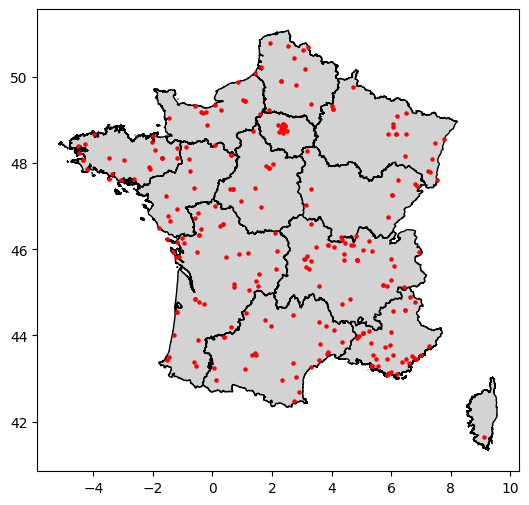

In [46]:
ax = make_fond_carte(reg_sans_dom)
layer = carte(shp_sans_dom, ax, 2010)

On défini l'année de début et de fin de l'animation. 

In [54]:
annee_min = shp_sans_dom['annee_de_cr'].min()
annee_max = shp_sans_dom['annee_de_cr'].max()

print("annee_min=", annee_min)
print("annee_max=", annee_max)

print(sorted(shp_sans_dom['annee_creation']))


annee_min= 1604.0
annee_max= 2022.0
[1604.0, 1869.0, 1874.0, 1905.0, 1920.0, 1923.0, 1930.0, 1935.0, 1944.0, 1946.0, 1946.0, 1946.0, 1946.0, 1947.0, 1947.0, 1948.0, 1948.0, 1948.0, 1948.0, 1948.0, 1948.0, 1948.0, 1948.0, 1949.0, 1950.0, 1950.0, 1950.0, 1951.0, 1951.0, 1952.0, 1952.0, 1954.0, 1954.0, 1954.0, 1957.0, 1958.0, 1958.0, 1958.0, 1959.0, 1960.0, 1960.0, 1960.0, 1960.0, 1960.0, 1961.0, 1961.0, 1962.0, 1962.0, 1964.0, 1964.0, 1964.0, 1965.0, 1965.0, 1966.0, 1966.0, 1966.0, 1966.0, 1966.0, 1966.0, 1966.0, 1967.0, 1967.0, 1967.0, 1967.0, 1968.0, 1968.0, 1968.0, 1968.0, 1968.0, 1968.0, 1969.0, 1969.0, 1970.0, 1970.0, 1970.0, 1970.0, 1970.0, 1971.0, 1971.0, 1971.0, 1971.0, 1971.0, 1971.0, 1971.0, 1972.0, 1972.0, 1972.0, 1972.0, 1972.0, 1972.0, 1972.0, 1972.0, 1973.0, 1973.0, 1973.0, 1973.0, 1973.0, 1973.0, 1973.0, 1973.0, 1973.0, 1973.0, 1973.0, 1973.0, 1974.0, 1974.0, 1974.0, 1974.0, 1974.0, 1974.0, 1975.0, 1975.0, 1975.0, 1975.0, 1975.0, 1975.0, 1975.0, 1975.0, 1975.0, 1976.0, 197

On voit que le premier festival de notre base de donnée à été créé en 1604. Le suivant a été créé en 1869 et celui d'après encore en 1874 et le prochain encore en 1905. Comme la création de l'animation prend beaucoup de temps, on va negliger la modélisation 3 premiers festivals, et commencer notre modélisation en 1904. 

On creer le code qui va creer l'animation. Attention, le chunck prochain mets 2h30 à s'executer. Le résultats du gif complet est présent en annexe. 

total_years= 6
annee 2015
...
annee 2015
...
annee 2016
...
annee 2017
...
annee 2018
...
annee 2019
...
annee 2020
...
annee 2015
...


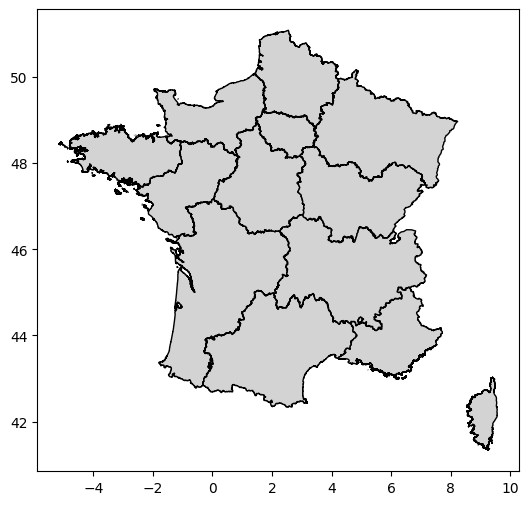

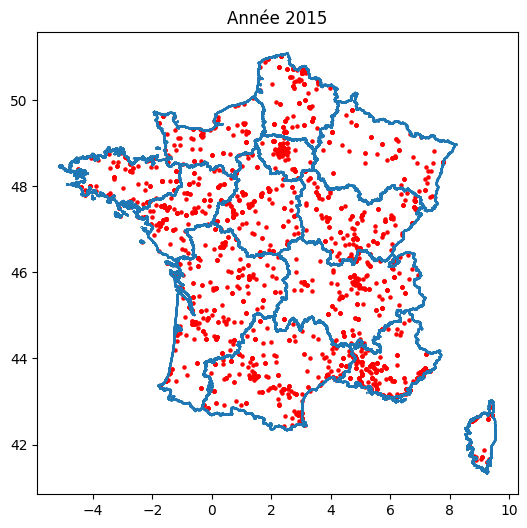

In [ ]:
# Définir le nombre total d'années pour l'animation
annee_min = 1905
annee_max = 2023

total_years = annee_max - annee_min + 1
print("total_years=", total_years)


#On importe le fond de carte de la France
ax = make_fond_carte(reg_sans_dom)

#On initialise la figure
fig, ax = plt.subplots(figsize=(8, 6))
reg_sans_dom.boundary.plot(ax=ax)

def update(frame):
    #ax.clear()
    reg_sans_dom.boundary.plot(ax=ax)
    print("annee", annee_min + frame)
    
    # Appeler votre fonction existante pour afficher la carte pour une année spécifique
    layer = carte(shp_sans_dom, ax, annee_min + frame)
    print("...")
    ax.set_title(f'Année {annee_min + frame}')
    return [layer]
    #ax.set_aspect('equal')


# Création de l'animation
anim = FuncAnimation(fig, update, frames=total_years, repeat=False)

writer = PillowWriter(fps=2)
anim.save("test_avec_titre.gif", writer=writer)

In [ ]:
#On commence aux année 1900
#Débuguer le fait que la figure change de forme de temps en temps. En terme de fps on est bien. 

#On choisit notre année de départ et d'arrivée
print(shp_sans_dom['annee_de_cr'])

# Définir le nombre total d'années pour l'animation
#annee_min = shp_sans_dom['annee_de_cr'].min()
annee_min = 1900
print("annee_min=", annee_min)
annee_max = shp_sans_dom['annee_de_cr'].max()
print("annee_max=", annee_max)

total_years = annee_max - annee_min + 1
print("total_years=", total_years)


#On importe le fond de carte de la France
ax = make_fond_carte(reg_sans_dom)


fig, ax = plt.subplots(figsize=(8, 6))
reg_sans_dom.boundary.plot(ax=ax)

def update(frame):
    #ax.clear()
    reg_sans_dom.boundary.plot(ax=ax)
    print("frame =", frame)
    print("annee", annee_min + frame)
    
    # Appeler votre fonction existante pour afficher la carte pour une année spécifique
    layer = carte(shp_sans_dom, ax, annee_min + frame)
    print("test")
    ax.set_title(f'Année {annee_min + frame}')

    return [layer]
    #ax.set_aspect('equal')


# Création de la figure et de l'axe initial
#france_map.boundary.plot(ax=ax)

# Création de l'animation
anim = FuncAnimation(fig, update, frames=total_years, repeat=False)

writer = PillowWriter(fps=2)
anim.save("Modélisation_creation_festival_en_France_1904-2022.gif", writer=writer)

Pour avoir un appercu de la fonction, voici le code qui tourne sur cinq ans. 

In [ ]:
# Définir le nombre total d'années pour l'animation
annee_min = 2015
annee_max = 2020

total_years = annee_max - annee_min + 1
print("total_years=", total_years)


#On importe le fond de carte de la France
ax = make_fond_carte(reg_sans_dom)

#On initialise la figure
fig, ax = plt.subplots(figsize=(8, 6))
reg_sans_dom.boundary.plot(ax=ax)

def update(frame):
    #ax.clear()
    reg_sans_dom.boundary.plot(ax=ax)
    print("annee", annee_min + frame)
    
    # Appeler votre fonction existante pour afficher la carte pour une année spécifique
    layer = carte(shp_sans_dom, ax, annee_min + frame)
    print("...")
    ax.set_title(f'Année {annee_min + frame}')
    return [layer]
    #ax.set_aspect('equal')


# Création de l'animation
anim = FuncAnimation(fig, update, frames=total_years, repeat=False)

writer = PillowWriter(fps=2)
anim.save("Modélisation_carte_2015-2020.gif", writer=writer)

## B) Regressions logistiques multinomiales : on tente d'estimer la discipline dominante du festival en fonction de 1) âge moyen de la commune 2) la PCS "moyenne" de la commune

In [20]:
# I. Première reg

# Exclure les lignes avec des valeurs manquantes dans 'tranche_age_majoritaire'
data_filtered = df_merged.dropna(subset=['numerotation_tranche'])

data_filtered['numerotation_tranche'] = data_filtered['numerotation_tranche'].astype('int64')
data_filtered['discipline_dominante'].head()


"""On échange l'ordre du mapping original dans lequel la valeur 0 était arts visuels et on la remplace par pluridisciplinaire 
car il est plus pertinent de regarder la probabilité qu'un festival soit de tel type plutôt que pluridisciplinaire au lieu de regarder s'il est 
de tel type plutôt que d'arts visuels"""

cat_order = ['Pluridisciplinaire', 'Arts visuels, arts numériques', 'Cinéma, audiovisuel', 
             'Livre, littérature', 'Musique', 'Spectacle vivant']
data_filtered['discipline_dominante'] = pd.Categorical(data_filtered['discipline_dominante'], 
                                                       categories=cat_order, 
                                                       ordered=True)

data_filtered['discipline_dominante'] = pd.Categorical(data_filtered['discipline_dominante']).codes

# Obtenir le mappage entre catégories et codes
mapping = {code: cat for code, cat in enumerate(cat_order)}
print("Le mappage des catégories est le suivant :", mapping, "c'est grâce à cela que l'on peut lire le tableau de la régression")

data_filtered['discipline_dominante'].head()

# Préparation des variables explicatives (caractéristiques) et de la variable cible
X_filtered = data_filtered[['numerotation_tranche']]
y_filtered = data_filtered['discipline_dominante']

# Créez le modèle de régression logistique multinomiale
model_filtered = smf.mnlogit(f'discipline_dominante ~ numerotation_tranche', data=data_filtered)  # Ajoutez une constante (intercept) aux données

# Ajustez le modèle aux données
results_filtered = model_filtered.fit()

# Obtenez un tableau récapitulatif des résultats
summary_filtered = results_filtered.summary()
print(summary_filtered)

# Pour savoir ce qu'il se passe 
cat_mapping = dict(enumerate(pd.Categorical(data_filtered['discipline_dominante']).categories))
print(cat_mapping)


/var/folders/qw/b1h94pqd2pq3qzj8rr8wl1dw0000gn/T/ipykernel_73144/668949748.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['numerotation_tranche'] = data_filtered['numerotation_tranche'].astype('int64')
/var/folders/qw/b1h94pqd2pq3qzj8rr8wl1dw0000gn/T/ipykernel_73144/668949748.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['discipline_dominante'] = pd.Categorical(data_filtered['discipline_dominante'],
/var/folders/qw/b1h94pqd2pq3qzj8rr8wl1dw0000gn/T/ipykernel_73144/6689

Le mappage des catégories est le suivant : {0: 'Pluridisciplinaire', 1: 'Arts visuels, arts numériques', 2: 'Cinéma, audiovisuel', 3: 'Livre, littérature', 4: 'Musique', 5: 'Spectacle vivant'} c'est grâce à cela que l'on peut lire le tableau de la régression
Optimization terminated successfully.
         Current function value: 1.484205
         Iterations 6


                           MNLogit Regression Results                           
Dep. Variable:     discipline_dominante   No. Observations:                 3531
Model:                          MNLogit   Df Residuals:                     3521
Method:                             MLE   Df Model:                            5
Date:                  Sat, 30 Dec 2023   Pseudo R-squ.:                0.006149
Time:                          10:01:05   Log-Likelihood:                -5240.7
converged:                         True   LL-Null:                       -5273.2
Covariance Type:              nonrobust   LLR p-value:                 1.205e-12
discipline_dominante=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.2351      0.213     -1.106      0.269      -0.652       0.182
numerotation_tranche      -0.0043      0.080     -0.054      0.957      -0.160 

Étant données les p-valeurs observées, nos résultats ne sont pas très significatifs. Cependant, nous constatons tout de même que pour les arts visuels et le cinéma, plus la population d'une commune est vieille, moins elle a de chance d'accueillir un festival de ce type (plutôt qu'un festival pluridisciplinaire). Pour les autres disciplines, l'âge renforce la probabilité d'accueillir un festival de ce type plutôt que pluridisciplinaire. 

In [171]:
# II. Régression 2 
# Exclure les lignes avec des valeurs manquantes dans 'numerotation_tranche'
data_filtered = df_merged.dropna(subset=['numerotation_tranche'])

# Filtrer pour les données où 'discipline_dominante' est 'Musique'
data_filtered_mus = data_filtered[data_filtered['discipline_dominante'] == 'Musique']
data_filtered_mus['numerotation_tranche'] = data_filtered_mus['numerotation_tranche'].astype('int64')

# Convertir 'sous_categorie_musique_cnm' en catégorie et conserver les catégories originales pour le mapping
temp_cat = pd.Categorical(data_filtered_mus['sous_categorie_musique_cnm'])
cat_mapping = dict(enumerate(temp_cat.categories))
print("Mapping des catégories originales :", cat_mapping)

# Convertir les catégories en codes pour le modèle
data_filtered_mus['sous_categorie_musique_cnm'] = temp_cat.codes

# Préparation des variables explicatives (caractéristiques) et de la variable cible
X_filtered = data_filtered_mus[['numerotation_tranche']]
y_filtered = data_filtered_mus['sous_categorie_musique_cnm']

# Créer le modèle de régression logistique multinomiale
model_filtered_mus = smf.mnlogit('sous_categorie_musique_cnm ~ numerotation_tranche', data=data_filtered_mus)

# Ajuster le modèle aux données
results_filtered_mus = model_filtered_mus.fit()

# Obtenir un tableau récapitulatif des résultats
summary_filtered_mus = results_filtered_mus.summary()
print(summary_filtered_mus)


/var/folders/qw/b1h94pqd2pq3qzj8rr8wl1dw0000gn/T/ipykernel_30759/28760195.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered_mus['numerotation_tranche'] = data_filtered_mus['numerotation_tranche'].astype('int64')
/var/folders/qw/b1h94pqd2pq3qzj8rr8wl1dw0000gn/T/ipykernel_30759/28760195.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered_mus['sous_categorie_musique_cnm'] = temp_cat.codes
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:2299: Runt

Mapping des catégories originales : {0: '01- Chanson', 1: '02- Musiques amplifiées ou électroniques', 2: '03- Jazz, blues et musiques improvisées', 3: '04- Musiques traditionnelles et du monde', 4: '05- Humour', 5: '07- Musiques actuelles sans distinction', 6: '08- Musiques (sans distinction esthétique)', 7: '09- Pluridisciplinaire', 8: '11- Musique classique, lyrique, contemporaine, autres', 9: '13- Autres spectacles (théâtre, arts de la rue et du cirque...)', 10: '14- Autres disciplines culturelles (arts plastiques, cinéma, photographie, livre...)', 11: '15- Fête de la ville, feria, fête votive, fête de la pomme, etc.'}
Optimization terminated successfully.
         Current function value: nan
         Iterations 4
                              MNLogit Regression Results                              
Dep. Variable:     sous_categorie_musique_cnm   No. Observations:                 1581
Model:                                MNLogit   Df Residuals:                     1557
Method:     

In [185]:
# III. Reg 3 : revenu et discipline dominante

# I. Première reg

# Exclure les lignes avec des valeurs manquantes dans 'tranche_age_majoritaire'
data_filtered2 = df_merged.dropna(subset=['numerotation_PCS'])

data_filtered2['numerotation_PCS'] = data_filtered2['numerotation_PCS'].astype('int64')
print(data_filtered2['discipline_dominante'])

data_filtered2['discipline_dominante'] = pd.Categorical(data_filtered2['discipline_dominante']).codes

#print(data_filtered2['discipline_dominante'])

# Préparation des variables explicatives (caractéristiques) et de la variable cible
X_filtered = data_filtered2[['numerotation_PCS']]
y_filtered = data_filtered2['discipline_dominante']

# Créez le modèle de régression logistique multinomiale
model_filtered2 = smf.mnlogit(f'discipline_dominante ~ numerotation_PCS', data=data_filtered2)  # Ajoutez une constante (intercept) aux données

# Ajustez le modèle aux données
results_filtered2 = model_filtered2.fit()

# Obtenez un tableau récapitulatif des résultats
summary_filtered2 = results_filtered2.summary()
print(summary_filtered2)

# Pour savoir ce qu'il se passe 
cat_mapping = dict(enumerate(pd.Categorical(data_filtered2['discipline_dominante']).categories))
print(cat_mapping)


/var/folders/qw/b1h94pqd2pq3qzj8rr8wl1dw0000gn/T/ipykernel_30759/178928703.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered2['numerotation_PCS'] = data_filtered2['numerotation_PCS'].astype('int64')
/var/folders/qw/b1h94pqd2pq3qzj8rr8wl1dw0000gn/T/ipykernel_30759/178928703.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered2['discipline_dominante'] = pd.Categorical(data_filtered2['discipline_dominante']).codes


0                 Cinéma, audiovisuel
2                 Cinéma, audiovisuel
3                  Livre, littérature
4                    Spectacle vivant
5                    Spectacle vivant
11                   Spectacle vivant
12      Arts visuels, arts numériques
19                   Spectacle vivant
20                 Pluridisciplinaire
21                            Musique
24                            Musique
26                            Musique
27                   Spectacle vivant
29                            Musique
30                            Musique
31                            Musique
32                   Spectacle vivant
34                            Musique
36                 Livre, littérature
38                 Pluridisciplinaire
39                 Livre, littérature
40                Cinéma, audiovisuel
42                   Spectacle vivant
46                   Spectacle vivant
48                 Livre, littérature
50                            Musique
54          

EXPLIQUER QUE PAS TROP DE RÉSULTATS